<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Feature%20Selection/Feature_importances_with_a_forest_of_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt


Feature importance based on mean decrease in impurity are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

Impurity-based feature importances have a bias toward high-cardinality features

Permutation feature importance as an alternative. It overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

MDI is less likely than permutation importance to fully omit a feature.

## Data generation

* Generate a synthetic dataset with only 3 informative features.
* The dataset is not shuffled to ensure that the informative features will correspond to the three first columns of X. 
* Split our dataset into training and testing subsets.

In [1]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [7]:
feature_names = [f'feature_{i}' for i in range(10)]

## Feature importance based on mean decrease in impurity

* `feature_importances_`  are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

*  Impurity-based feature importances can be misleading for high cardinality features


In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)
importance = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

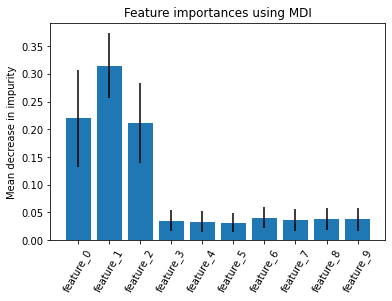

In [13]:
def plot_util(x,y,err,title,ylabel):
  plt.bar(x,y, yerr=err)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xticks(rotation=60);


plot_util(x = feature_names,
          y = importance,
          err = std,
          title = "Feature importances using MDI",
          ylabel = "Mean decrease in impurity")

## Feature importance based on feature permutation

**Permutation feature importance overcomes limitations of the impurity-based feature importance:**
* they do not have a bias toward high-cardinality features 
* they can be computed on a left-out test set.

**`from sklearn.inspection import permutation_importance`**
* The estimator is required to be a fitted estimator.
* X can be the data set used to train the estimator or a hold-out set.

The permutation importance of a feature is calculated as follows.
* First, a baseline metric, defined by scoring, is evaluated on a (potentially different) dataset defined by the X. 
* Next, a feature column from the validation set is permuted and the metric is evaluated again. 
* The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column.

In [16]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, scoring='accuracy', n_repeats=10)

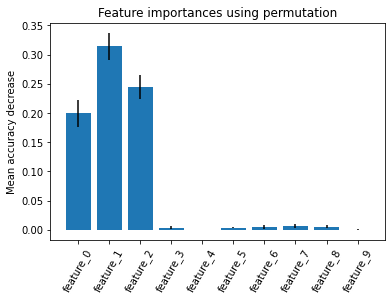

In [17]:
plot_util(x = feature_names,
          y = result.importances_mean,
          err = result.importances_std,
          title = "Feature importances using permutation",
          ylabel = "Mean accuracy decrease")